In [49]:
# import the relevant packages
import pandas as pd

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

## Preprocessing the data

### Training dataset

In [2]:
# load the dataset
train_data = pd.read_csv("Census_income_train.csv")

In [3]:
# inspect the dataset
train_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
len(train_data)

32560

In [5]:
# No null or NaN values
train_data.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64

#### Removing rows with unknown values ('?')

In [ ]:
# All missing or unknow values, however, are marked with a question mark (?)
# There are 3 columns which contain '?' - Workclass, Occupation, Native-country

In [6]:
# Let's start with the Workclass column
# We can obtain a list of boolean values indicating whether there is a '?' on the current row
train_data["Workclass"].str.contains("\?")

0        False
1        False
2        False
3        False
4        False
         ...  
32555    False
32556    False
32557    False
32558    False
32559    False
Name: Workclass, Length: 32560, dtype: bool

In [7]:
# Let's reverse all the boolean values
train_data["Workclass"].str.contains("\?") == False

0        True
1        True
2        True
3        True
4        True
         ... 
32555    True
32556    True
32557    True
32558    True
32559    True
Name: Workclass, Length: 32560, dtype: bool

In [8]:
# Take the subset of the dataframe rows which don't contain '?'
clean_train_data = train_data[train_data["Workclass"].str.contains("\?") == False]

In [9]:
len(clean_train_data)

30724

In [10]:
# Let's do the same for 'Occupation'
clean_train_data = clean_train_data[clean_train_data["Occupation"].str.contains("\?") == False]

In [11]:
len(clean_train_data)

30717

In [12]:
# And for 'Native-country'
clean_train_data = clean_train_data[clean_train_data["Native-country"].str.contains("\?") == False]

In [13]:
len(clean_train_data)

30161

In [14]:
# Finally, let's reset the index
clean_train_data = clean_train_data.reset_index(drop=True)

#### Creating dummy variables and separating inputs and targets

In [ ]:
# In the original data, there are both categorical and numerical data
# Decision trees and random forest can work with categorical data in general
# However, this is not implemented in sklearn
# So, we need to convert the categorical data to numerical
# We will do that with one hot encoding

In [15]:
# Pandas can automatically do that for us with '.get_dummies'
train_dummies = pd.get_dummies(clean_train_data, drop_first=False)

In [16]:
train_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K,Income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
# The last 2 columns are whether the income <= 50k and whether it is >50k
# Both of these carry the same information, so we will remove one of them
train_dummies = train_dummies.drop(['Income_ <=50K'],axis=1)

In [18]:
train_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# The input features are everything besides the last column
train_input = train_dummies.iloc[:,:-1]

# The target/output is just the last column
train_target = train_dummies.iloc[:,-1]

In [20]:
train_input.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Portugal,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
train_target.head()

0    0
1    0
2    0
3    0
4    0
Name: Income_ >50K, dtype: uint8

### Test dataset

In [ ]:
# Let's do the same preprocessing on the test dataset

In [22]:
# Load test data
test_data = pd.read_csv("Census_income_test.csv")

In [23]:
test_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [24]:
len(test_data)

16281

#### Cleaning unknown ('?') values

In [25]:
clean_test_data = test_data[test_data["Workclass"].str.contains("\?") == False]

In [26]:
len(clean_test_data)

15318

In [27]:
clean_test_data = clean_test_data[clean_test_data["Occupation"].str.contains("\?") == False]

In [28]:
len(clean_test_data)

15315

In [29]:
clean_test_data = clean_test_data[clean_test_data["Native-country"].str.contains("\?") == False]

In [30]:
len(clean_test_data)

15060

In [31]:
clean_test_data = clean_test_data.reset_index(drop=True)

#### Creating dummy variables and sepratting inputs and targets

In [32]:
test_dummies = pd.get_dummies(clean_test_data, drop_first=False)

In [33]:
test_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K.,Income_ >50K.
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [34]:
test_dummies = test_dummies.drop(['Income_ <=50K.'],axis=1)

In [35]:
test_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ >50K.
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [36]:
test_input = test_dummies.iloc[:,:-1]
test_target = test_dummies.iloc[:,-1]

In [37]:
test_target.head()

0    0
1    0
2    1
3    1
4    0
Name: Income_ >50K., dtype: uint8

## Creating and Visualizing the tree

In [44]:
clf = tree.DecisionTreeClassifier(random_state=365, ccp_alpha=0.001)

In [45]:
clf.fit(train_input, train_target)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=365)

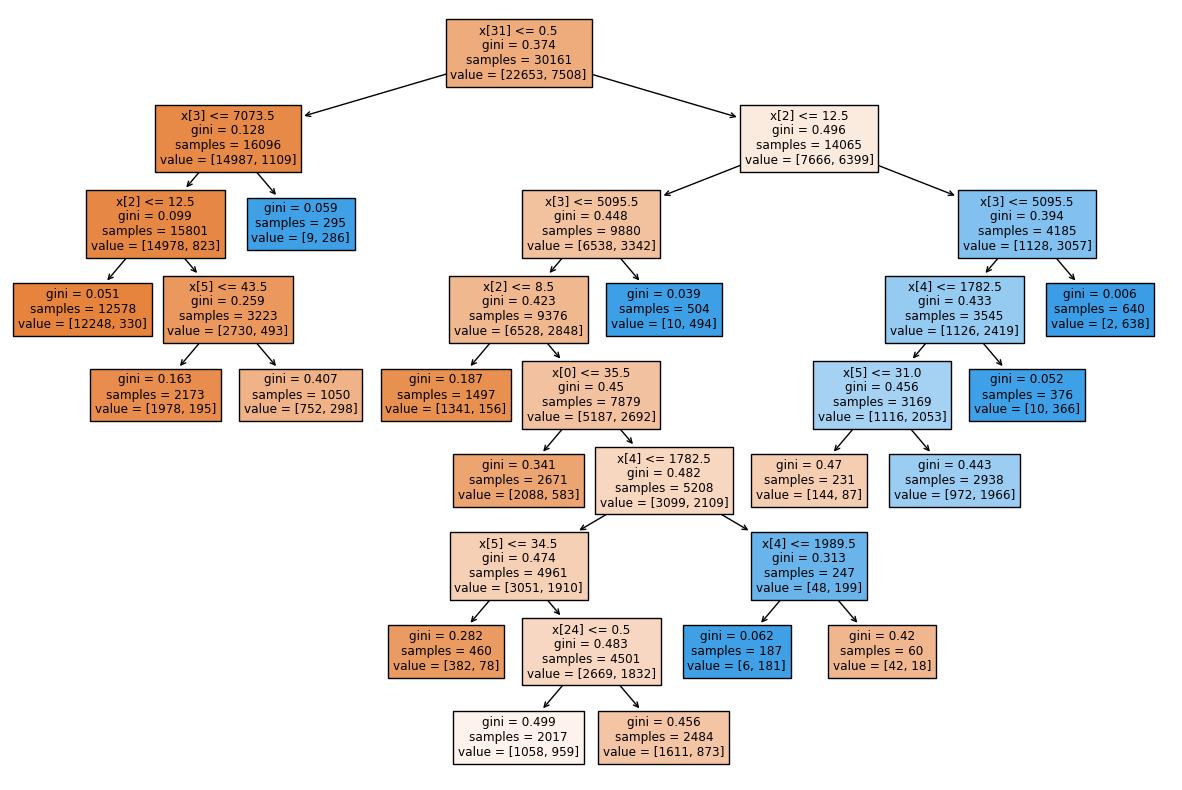

In [46]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True)
plt.show()

## Testing the model

In [47]:
test_pred= clf.predict(test_input)

In [48]:
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90     11360
           1       0.79      0.51      0.62      3700

    accuracy                           0.85     15060
   macro avg       0.82      0.73      0.76     15060
weighted avg       0.84      0.85      0.83     15060



## Creating and training Random Forest model

In [54]:
clf2 = RandomForestClassifier(random_state=365, ccp_alpha=0.0001)

In [55]:
clf2.fit(train_input, train_target)

RandomForestClassifier(ccp_alpha=0.0001, random_state=365)

## Testing the model

In [56]:
test_pred2 = clf2.predict(test_input)

In [57]:
print(classification_report(test_target, test_pred2))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11360
           1       0.77      0.62      0.68      3700

    accuracy                           0.86     15060
   macro avg       0.83      0.78      0.80     15060
weighted avg       0.86      0.86      0.86     15060

